In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

<bold><h3>Combine all CSV files in each folder into a single CSV file per folder</h3><bold>

In [ ]:
dfs = []

for i in range(1,6):
    file_pattern = f"Etaj {i}/Log1-*.xlsx"
    file_list = glob.glob(file_pattern)

    for file in file_list:
        df = pd.read_excel(file)
        dfs.append(df)

    merged_df = pd.concat(dfs, ignore_index=True)

    merged_df.columns = ["System Time","Power Consumed"]

    merged_df.to_csv(f"etaj{i}_merged_data.csv", index=False)

<bold><h3>Combine all CSV files into one CSV file</h3></bold>

In [ ]:
file_pattern = "etaj*_merged_data.csv"
file_list = glob.glob(file_pattern)

dfs = []

for file in file_list:
    df = pd.read_csv(file)
    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

merged_df.to_csv("all_etaj_merged_data.csv", index=False)

<bold><h3>Read the dataset and get the count of total data</h3></bold>

In [3]:
df = pd.read_csv("all_etaj_merged_data.csv")
df.size

142187900

<bold><h3>Get all the information from the database</h3></bold>

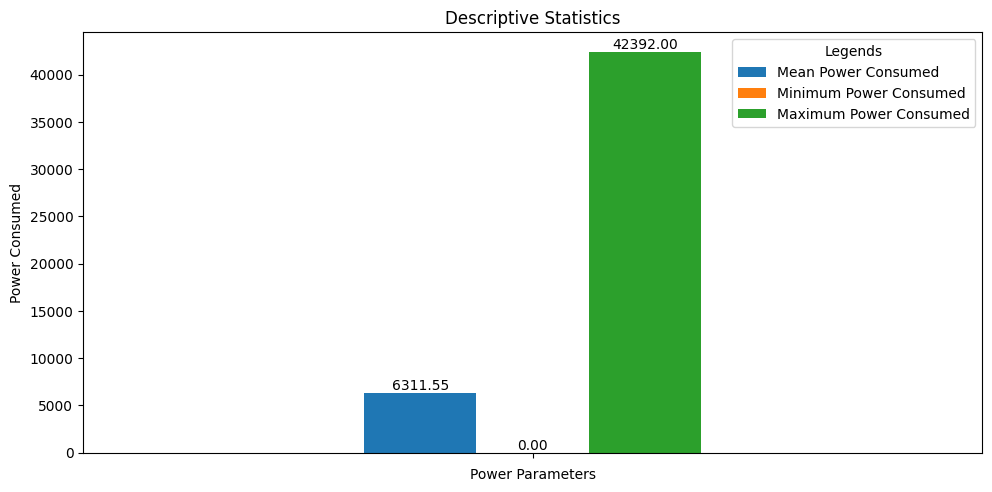

In [51]:
stats = df.describe().loc[['mean', 'min', 'max']]
stats.columns = ['']
stats = stats.transpose()
stats.columns = ['Mean Power Consumed', 'Minimum Power Consumed', 'Maximum Power Consumed']

ax = stats.plot(kind='bar', figsize=(10, 5), width=0.3, color=['#1f77b4', '#ff7f0e', '#2ca02c'], title='Descriptive Statistics')

plt.ylabel('Power Consumed')
plt.xlabel('Power Parameters')
plt.xticks(rotation=0)
plt.legend(title='Legends', loc='upper right')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

plt.tight_layout(pad=1.0)
plt.show()

The code calculates descriptive statistics (mean, min, max) for the `Power Consumed` column in the DataFrame `df`. A bar chart is plotted to display these statistics - mean, maximum and minimum power consumed. 


<bold><h3>Minimum and Maximum Power consumption occurence</h3></bold>

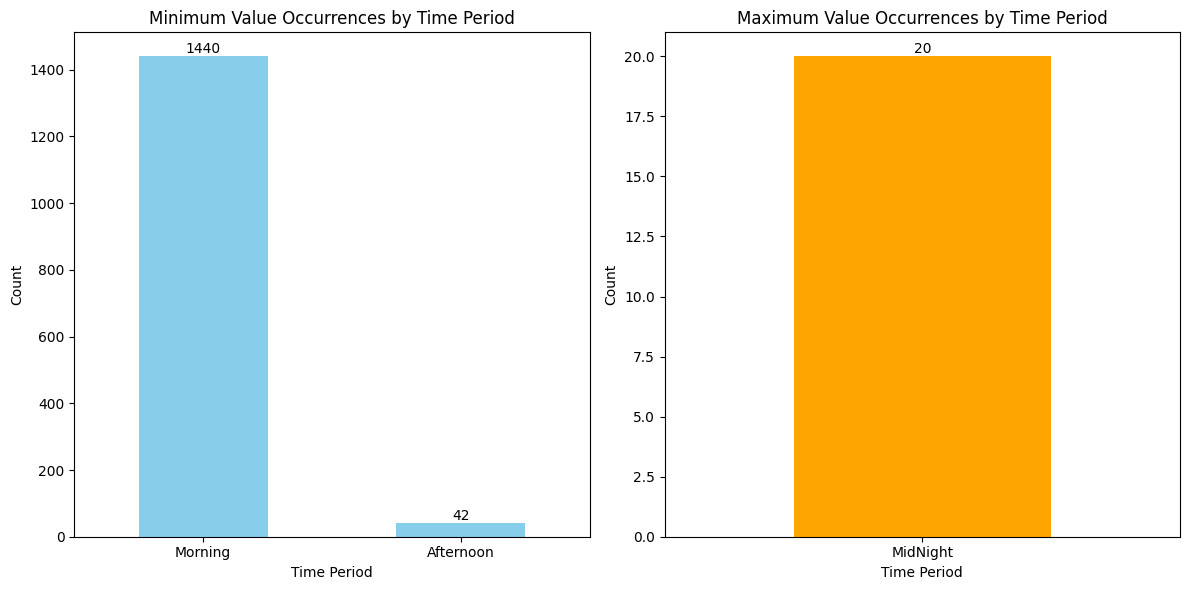

In [5]:
df['System Time'] = pd.to_datetime(df['System Time'])

def categorize_time(timestamp):
    hour = timestamp.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    elif 20 <= hour <= 23:
        return 'Night'
    else:
        return 'MidNight'

df['Time Period'] = df['System Time'].apply(categorize_time)

min_value = df['Power Consumed'].min()
max_value = df['Power Consumed'].max()

min_data = df[df['Power Consumed'] == min_value]
max_data = df[df['Power Consumed'] == max_value]

min_counts = min_data['Time Period'].value_counts()
max_counts = max_data['Time Period'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

min_counts.plot(kind='bar', ax=ax[0], color='skyblue', title='Minimum Value Occurrences by Time Period')
ax[0].set_xlabel('Time Period')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(min_counts.index, rotation=0) 
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%d', label_type='edge', fontsize=10)

max_counts.plot(kind='bar', ax=ax[1], color='orange', title='Maximum Value Occurrences by Time Period')
ax[1].set_xlabel('Time Period')
ax[1].set_ylabel('Count')
ax[1].set_xticklabels(max_counts.index, rotation=0)  
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

In this analysis, we examine the time differentiation for the minimum and maximum power occurrences during different time periods: Morning, Afternoon, and Night. The dataset is categorized into time periods based on the `System Time` column, and the power consumption values are analyzed to identify the time periods with the highest and lowest power consumption.

Key observations:
- **Minimum Power Occurrence**: The minimum power consumption (value = 0) is predominantly observed during the Morning period, with a smaller occurrence in the Afternoon.
- **Maximum Power Occurrence**: The maximum power consumption (value = 42392) is observed exclusively during the Midnight period.

The bar graphs provide a visual representation of the count of occurrences for minimum and maximum power consumption across different time periods.

<bold><h3>Day-wise Average Power Consumption Visualization</h3></bold>

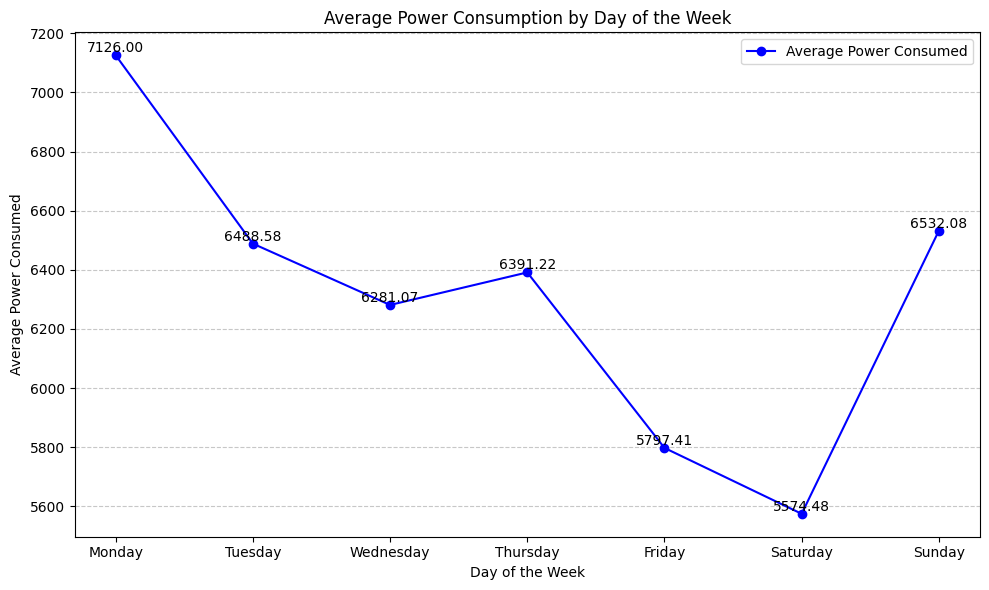

In [9]:
day_avg = df.groupby('Day')['Power Consumed'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
plt.plot(day_avg.index, day_avg.values, marker='o', color='blue', label='Average Power Consumed')
plt.ylabel('Average Power Consumed')
plt.xlabel('Day of the Week')
plt.title('Average Power Consumption by Day of the Week')
plt.xticks(rotation=0)

for i, value in enumerate(day_avg):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. **Highest Average Power Consumption** : The highest average power consumption is observed on **Monday**, with a value of approximately **7126.00** units.

2. **Lowest Average Power Consumption** : The lowest average power consumption occurs on **Saturday**, with a value of approximately **5574.48** units.

3. **Weekday vs Weekend** : Weekdays (Monday to Friday) generally show higher average power consumption compared to weekends (Saturday and Sunday). This trend could indicate higher energy usage during workdays, possibly due to industrial or commercial activities.

4. **Fluctuations Across the Week** : There is a noticeable decline in average power consumption as the week progresses, with Monday starting at the peak and Saturday reaching the lowest point. Sunday shows a slight increase compared to Saturday, possibly due to preparatory activities for the upcoming week.

The line chart demonstrates a clear pattern of higher energy usage during the start of the week, tapering off towards the weekend.

<bold><h3>Month-wise Average Power Consumption Visualization</h3></bold>

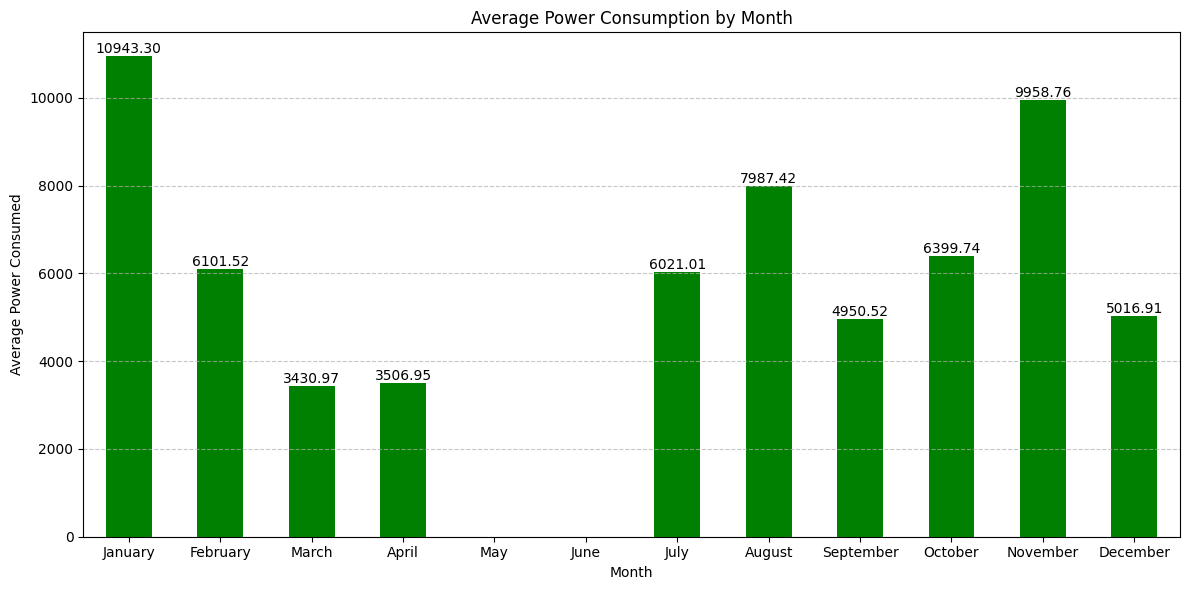

In [12]:
df['Month'] = df['System Time'].dt.month_name()

month_avg = df.groupby('Month')['Power Consumed'].mean().reindex([
'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(12, 6))
month_avg.plot(kind='bar', color='green', title='Average Power Consumption by Month')
plt.ylabel('Average Power Consumed')
plt.xlabel('Month')
plt.xticks(rotation=0)

for i, value in enumerate(month_avg):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. **Highest Average Power Consumption** : The highest average power consumption is observed in **January**, with a value of approximately **10,943.30** units. This could indicate increased energy usage during the winter season, possibly due to heating requirements.
      
2. **Lowest Average Power Consumption** : The lowest average power consumption is observed in **March**, with a value of approximately **3,430.97** units. This may reflect reduced energy usage during the transition from winter to spring.
      
3. **Seasonal Trends** : 
   <u>Winter Months (December to February)</u> : Higher power consumption is observed, particularly in January and November, likely due to heating needs.
   <u>Summer Months (June to August)</u> : Power consumption increases in **August**, possibly due to cooling requirements during peak summer.
        
4. **Missing Data** : Data for May and June is missing, which could impact the overall analysis and seasonal trends.